In [1]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c

In [4]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0918',
    file_name='sweep_12h_er_Xqm_v2-1',
)

In [5]:
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'embedding_n_repetitions', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

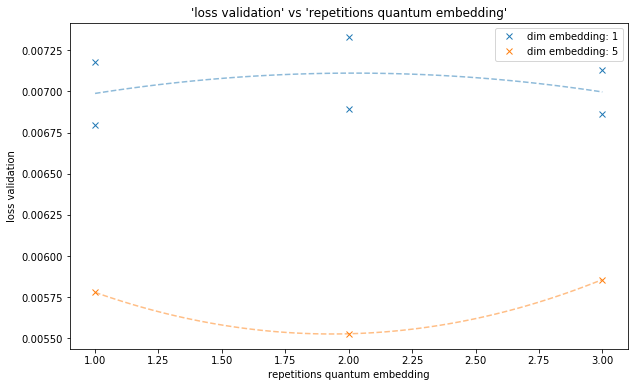

In [68]:
sweep.plot(
    x_key='embedding_n_repetitions',
    y_key='loss_validation',
    legend_keys=['embedding_dim'],
    fit_degree=2,
    replace=[('embedding_n_repetitions', 'repetitions quantum embedding'), ('embedding_dim', 'dim embedding'), ('loss_validation', 'loss validation')],
)

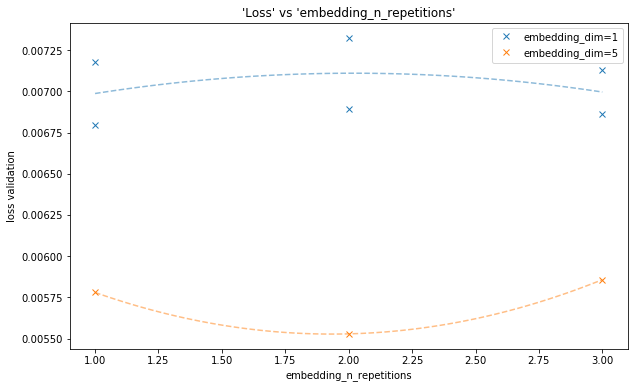

In [11]:
arrays = sweep.arrays_trimmed

# plot
idx = -1
plt.figure(figsize=(10,6))
for embedding_dim in [1,5]:
    # for embedding_n_repetitions in [1,2,3]:
        idx += 1
        points_to_plot = (arrays['v'] == embedding_dim) 
        x = arrays['embedding_n_repetitions'][points_to_plot]
        y = arrays['loss_validation'][points_to_plot]

        plot_w_poly_fit(
            x, y, degree=2,
            options_data={'marker': 'x', 'linestyle': '', 'color': colors[idx], 'label': 'embedding_dim={}'.format(embedding_dim)},
            options_fit={'linestyle': '--', 'color': colors[idx], 'alpha': 0.5}
        )
plt.xlabel('embedding_n_repetitions')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'embedding_n_repetitions'")
plt.show()

In [ ]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0914',
    file_name='sweep_12c_e_v2-1',
)

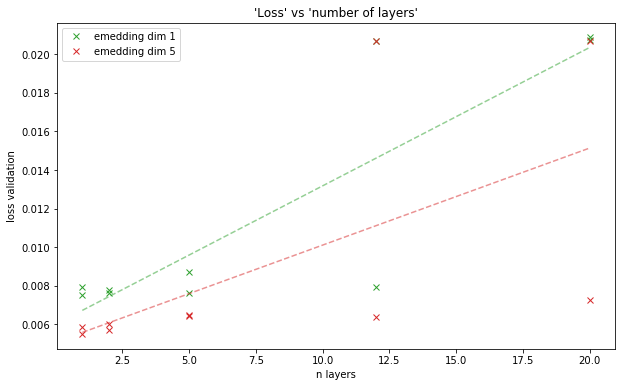

In [ ]:
arrays = sweep.arrays

# plot
plt.figure(figsize=(10,6))
for i in [1,5]:
    idx += 1
    x = arrays['n_layers_block'][arrays['embedding_dim']==i]
    y = arrays['loss_validation'][arrays['embedding_dim']==i]

    plot_w_poly_fit(
        x, y, degree=1,
        options_data={'marker': 'x', 'linestyle': '', 'label': 'emedding dim {}'.format(i), 'color': colors[idx]},
        options_fit={'linestyle': '--', 'color': colors[idx], 'alpha': 0.5}
    )

plt.xlabel('n layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of layers'")
plt.show()

In [ ]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0912',
    file_name='sweep_12h_e_Am_Xqm-1',
)

In [ ]:
arrays = sweep.arrays_trimmed

In [ ]:
arrays.keys()

dict_keys(['idx', 'repetitions', 'n_layers_quantum_block', 'n_qubits', 'qubits_measurement', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'time_train'])

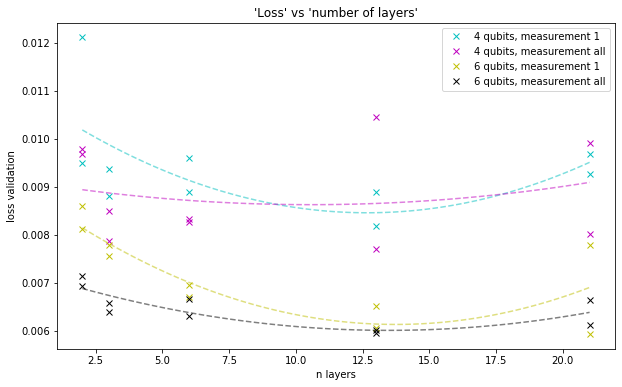

In [ ]:
# list of colors
colors = ['b', 'g', 'r', 'orange', 'c', 'm', 'y', 'k', 'w']

# plot
plt.figure(figsize=(10,6))
for qubits in [4,6]:
    for measurement in ['1','all']:    
        idx += 1
        points_to_plot = (arrays['n_qubits'] == qubits) & (arrays['qubits_measurement'] == measurement)
        x = arrays['n_layers_quantum_block'][points_to_plot] + np.ones_like(arrays['n_layers_quantum_block'][points_to_plot])
        y = arrays['loss_validation'][points_to_plot]

        plot_w_poly_fit(
            x, y, degree=2,
            options_data={'marker': 'x', 'linestyle': '', 'label': '{} qubits, measurement {}'.format(qubits, measurement), 'color': colors[idx]},
            options_fit={'linestyle': '--', 'color': colors[idx], 'alpha': 0.5}
        )

plt.xlabel('n layers')
plt.ylabel('loss validation')
plt.legend()
# plt.xscale('log')
plt.title("'Loss' vs 'number of layers'")
plt.show()